In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import shap


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [35]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
data = [train_df, test_df]

In [36]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [37]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [40]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [41]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

data = [train_df, test_df]
passenger_id = [train_df['PassengerId'].to_list(), test_df['PassengerId'].to_list()]

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Cabin'].fillna('Missing', inplace=True)
    dataset['Cabin'] = dataset['Cabin'].str[0]
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0
    dataset['Embarked'].fillna('S', inplace=True)
    dataset['Sex'] = dataset['Sex'].map({'male': 0,'female': 1})
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
    dataset['Fare'] = dataset['Fare'].apply(lambda x: round(x/10)*10)
    bins = [-0.001, 40, 120, 600]
    labels = [0, 1, 2]
    dataset['Fare'] = pd.cut(dataset['Fare'], bins=bins, labels=labels)

age_df = train_df[['Cabin', 'Age']].dropna().astype({'Age': 'int32'}).groupby(['Cabin'], as_index=False).median().sort_values(by='Age', ascending=False).reset_index(drop=True)
age_df['Age'] = age_df['Age'].apply(lambda x: round(x))
age_df = age_df.set_index('Cabin').to_dict()['Age']

for dataset in data:
    dataset['Age'] = dataset.apply(lambda x: age_df[x['Cabin']] if np.isnan(x['Age']) else x['Age'], axis=1)
    dataset['Age'] = dataset['Age'].astype('int32')


for dataset in data:
    dataset['Age_0'] = 0
    dataset['Age_1'] = 0
    dataset['Age_2'] = 0
    dataset['Age_3'] = 0
    dataset['Age_4'] = 0

    dataset.loc[dataset['Age'] <= 16, 'Age_0'] = 1
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age_1'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age_2'] = 1
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age_3'] = 1
    dataset.loc[dataset['Age'] > 64, 'Age_4'] = 1

prob = train_df.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob)
prob_df['Died'] = 1 - prob_df['Survived']
prob_df['Ratio'] = prob_df['Survived'] / prob_df['Died']
prob_df.sort_values(by='Ratio', ascending=False)

scaler = StandardScaler()
prob_df['Ratio'] = scaler.fit_transform(prob_df[['Ratio']])
prob_df.sort_values(by='Ratio', ascending=False)

embarked = train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)
embarked_df = pd.DataFrame(embarked).set_index('Embarked')
embarked_df['Died'] = 1 - embarked_df['Survived']
embarked_df['Ratio'] = embarked_df['Survived'] / embarked_df['Died']
embarked_df['Ratio'] = scaler.fit_transform(embarked_df[['Ratio']])

pclass = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)
pclass_df = pd.DataFrame(pclass).set_index('Pclass')

rare = train_df['Title'].value_counts().loc[lambda x : x < 10].index.to_list()
train_df['Title'] = train_df['Title'].replace(rare, 'Rare')
title = train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False).reset_index(drop=True)
title['Death'] = 1 - title['Survived']
title['Ratio'] = title['Survived'] / title['Death']
title = pd.DataFrame(title).set_index('Title')

train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df.loc[train_df['FamilySize'] > 6, 'FamilySize'] = 6
fsize = train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False).set_index('FamilySize')

fare = train_df[['Fare','Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)
fare_df = pd.DataFrame(fare).set_index('Fare')
fare_df['Died'] = 1 - fare_df['Survived']
fare_df['Ratio'] = fare_df['Survived'] / fare_df['Died']
fare_df['Ratio'] = scaler.fit_transform(fare_df[['Ratio']])

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].map(prob_df['Ratio'].to_dict())
    dataset['Embarked'] = dataset['Embarked'].map(embarked_df['Ratio'].to_dict())
    dataset['Pclass'] = dataset['Pclass'].map(pclass_df['Survived'].to_dict())
    dataset['Title'] = dataset['Title'].map(title['Ratio'].to_dict())
    dataset['FamilySize'] = dataset['FamilySize'].map(fsize['Survived'].to_dict())
    dataset['Fare'] = dataset['Fare'].map(fare_df['Ratio'].to_dict()).astype('float64')

for dataset in data:    
    dataset.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
    dataset.drop(['Name'], axis=1, inplace=True)
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)
    dataset.drop(['Age'], axis=1, inplace=True)
    
train_df.head()

C:\Users\Zohair Hashmi\AppData\Local\Temp\ipykernel_22140\2285286939.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare = train_df[['Fare','Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Survived,Pclass,Sex,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Age_0,Age_1,Age_2,Age_3,Age_4
0,0,0.242363,0,-1.233009,-1.067111,-0.895436,0.185780,0.552795,0,0,1,0,0,0
1,1,0.629630,1,0.016699,-0.129310,1.395687,3.807692,0.552795,0,0,0,1,0,0
2,1,0.242363,1,-1.233009,-1.067111,-0.895436,2.309091,0.303538,1,0,1,0,0,0
3,1,0.629630,1,0.016699,-0.129310,-0.895436,3.807692,0.552795,0,0,0,1,0,0
4,0,0.242363,0,-1.233009,-1.067111,-0.895436,0.185780,0.303538,1,0,0,1,0,0


## Model Training

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=3,colsample_bytree=0.8, gamma=1, random_state=123)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.8770949720670391


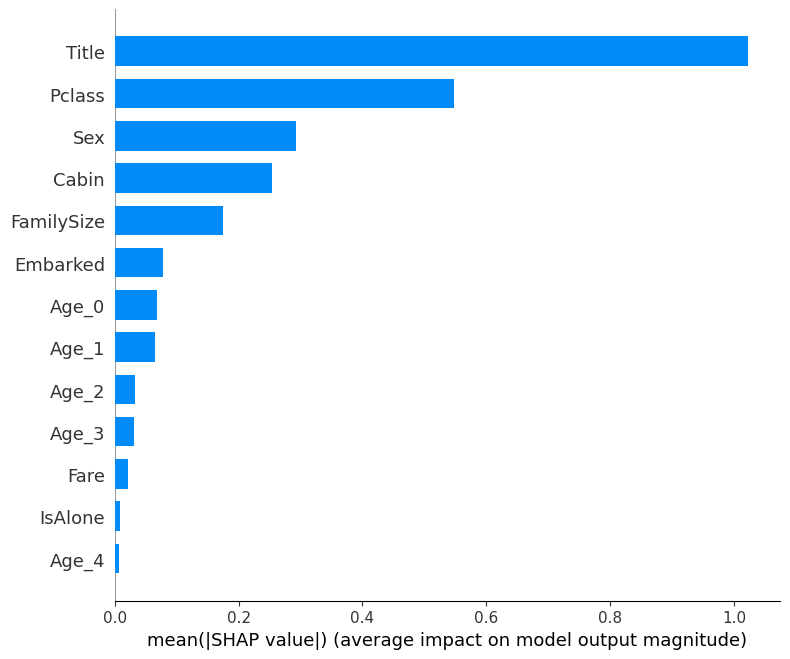

In [50]:
# shap values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")


In [75]:
# retrain model droping features with low shap values
X = train_df.drop(['Survived', 'IsAlone', 'Age_4', 'Age_3'], axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.5, max_depth=3,colsample_bytree=0.8, gamma=1, random_state=123)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.88268156424581


In [76]:
final_test = test_df.drop(['IsAlone', 'Age_4', 'Age_3'], axis=1)
final_pred = xgb_model.predict(final_test)
final_pred = pd.DataFrame(final_pred, columns=['Survived'])
final_pred['PassengerId'] = passenger_id[1]
final_pred = final_pred[['PassengerId', 'Survived']]
final_pred.to_csv('submissions/xgb_submission.csv', index=False)